EDA: COVID 19 Data Analysis

In [15]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# importing the dataset from downloaded zip file, r to read file
import zipfile
zf = zipfile.ZipFile(r"C:\Users\Supriya\AppData\Local\Temp\Temp1_data science.zip\data science\drive-download-20211129T055036Z-001 (1).zip")
df = pd.read_csv(zf.open('covid19_Confirmed_dataset.csv'))
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
df.shape

(266, 104)

In [18]:
# deleting unnecessary columns
data = df.drop (["Province/State", "Lat", "Long"], axis= 1, inplace= True)

In [19]:
df.shape

(266, 101)

In [20]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [21]:
# aggregate the rows by the countries
corona_dataset_aggregate = df.groupby("Country/Region").sum()

In [22]:
corona_dataset_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [23]:
corona_dataset_aggregate.shape

(187, 100)

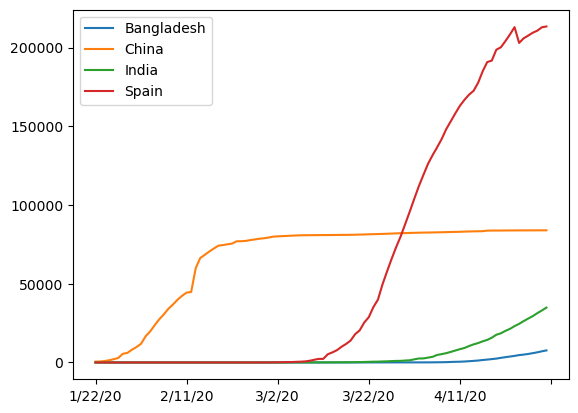

In [24]:
# visualize the data with respect to the country
corona_dataset_aggregate.loc["Bangladesh"].plot()
corona_dataset_aggregate.loc["China"].plot()
corona_dataset_aggregate.loc["India"].plot()
corona_dataset_aggregate.loc["Spain"].plot()
plt.legend()

<Axes: >

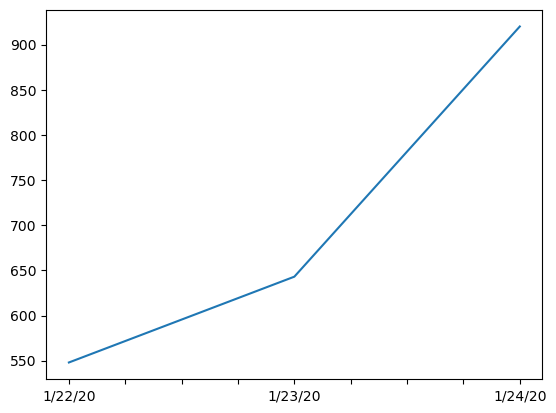

In [25]:
# spread of coronavirus for first 3 days in China
corona_dataset_aggregate.loc["China"][:3].plot()

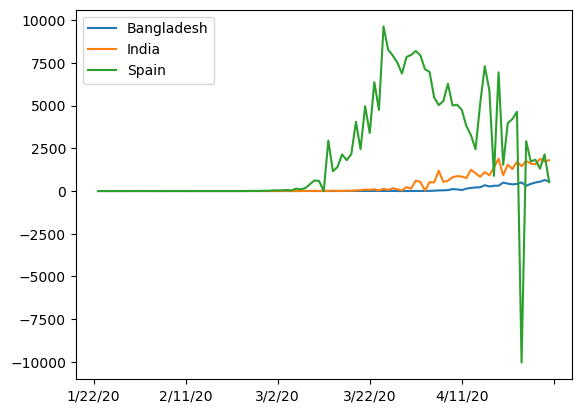

In [26]:
# first derivative of the curve to get the rate of the spread
corona_dataset_aggregate.loc["Bangladesh"].diff().plot()
corona_dataset_aggregate.loc["India"].diff().plot()
corona_dataset_aggregate.loc["Spain"].diff().plot()
plt.legend()

<Axes: >

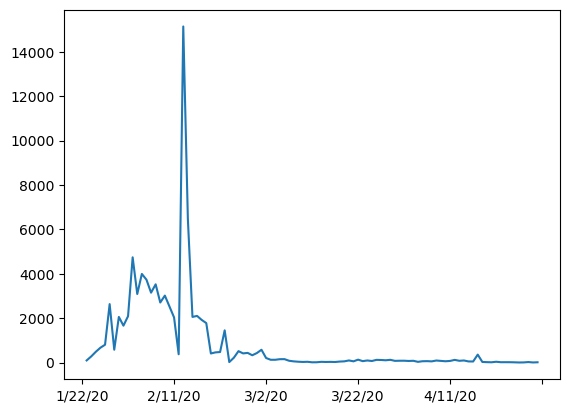

In [27]:
corona_dataset_aggregate.loc["China"].diff().plot()

In [28]:
# maximum infection rate
corona_dataset_aggregate.loc["China"].diff().max()

15136.0

In [29]:
# appending a column with the maximum infection rates to the existing dataset 
countries = list(corona_dataset_aggregate.index)
maximum_infection_rate = []

for c in countries:
    maximum_infection_rate.append(corona_dataset_aggregate.loc[c].diff().max())
corona_dataset_aggregate["maximum_infection_rate"] = maximum_infection_rate
corona_dataset_aggregate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,maximum_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [30]:
# creating a new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregate["maximum_infection_rate"])
corona_data

,maximum_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [31]:
# importing the 2nd dataset
import zipfile
zf = zipfile.ZipFile(r"C:\Users\Supriya\AppData\Local\Temp\Temp1_data science.zip\data science\drive-download-20211129T055036Z-001 (1).zip")
happiness_report = pd.read_csv(zf.open('worldwide_happiness_report.csv'))
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [32]:
# listing columns
l = list(happiness_report.columns)
print (l)

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


In [33]:
# checking all the country names enlisted
happiness_report['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [34]:
happiness_report.shape

(156, 9)

In [35]:
# dropping the useless columns
useless_col = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_report.drop(useless_col, axis = 1, inplace = True)
happiness_report.shape

(156, 5)

In [36]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [37]:
# indexing is necessary before joining
happiness_report.set_index("Country or region", inplace = True)
happiness_report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [38]:
# joining the two datasets
new_data = corona_data.join(happiness_report, how = "inner")
new_data

,maximum_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [39]:
# finding correlations
new_data.corr()

,maximum_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
maximum_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


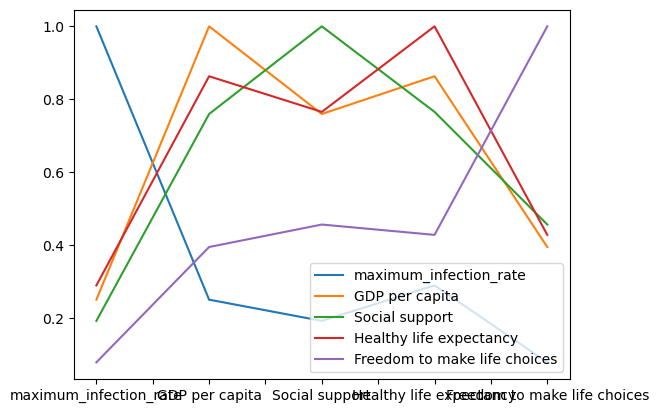

In [40]:
new_data.corr().plot()
plt.legend()

<Axes: >

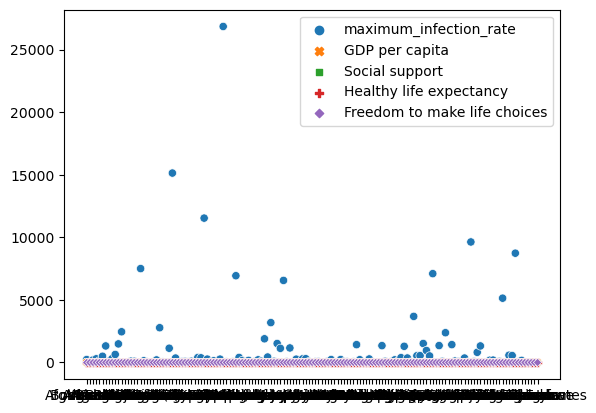

In [41]:
# visualization
sns.scatterplot(new_data)

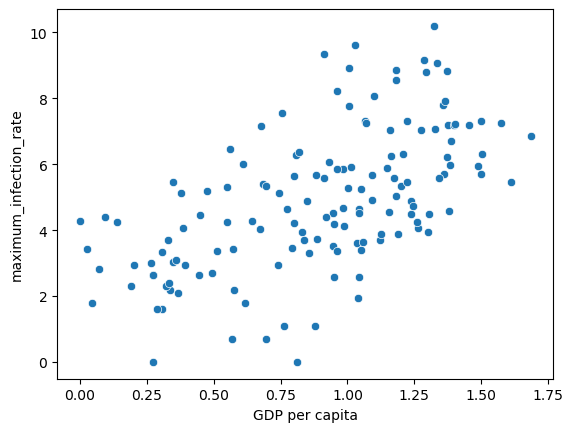

In [51]:
# passing x and y variables as keyword arguements to fix the type error related to the sns plot
x = new_data["GDP per capita"]
y = new_data["maximum_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))
plt.show()

<Axes: xlabel='GDP per capita', ylabel='maximum_infection_rate'>

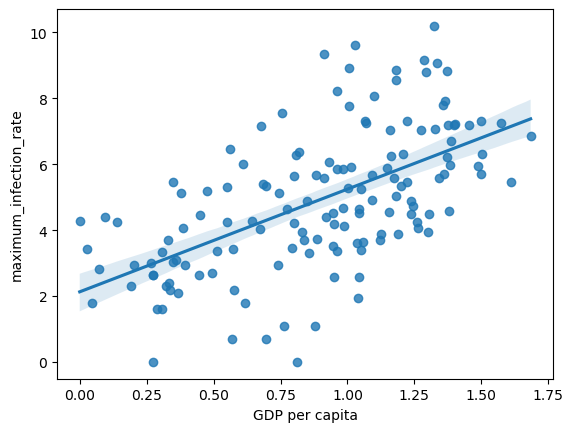

In [53]:
# regression plot
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='maximum_infection_rate'>

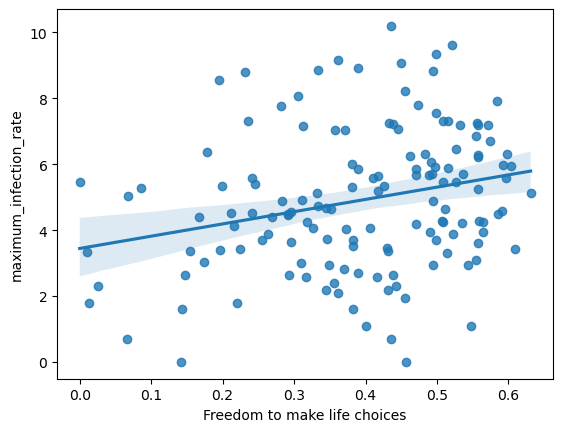

In [55]:
x = new_data["Freedom to make life choices"]
y = new_data["maximum_infection_rate"]
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='maximum_infection_rate'>

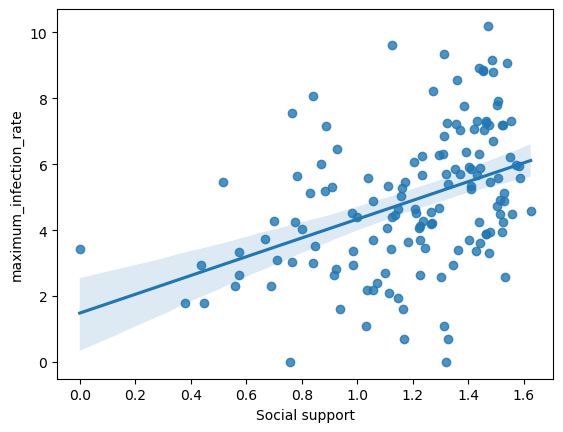

In [56]:
x = new_data["Social support"]
y = new_data["maximum_infection_rate"]
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='maximum_infection_rate'>

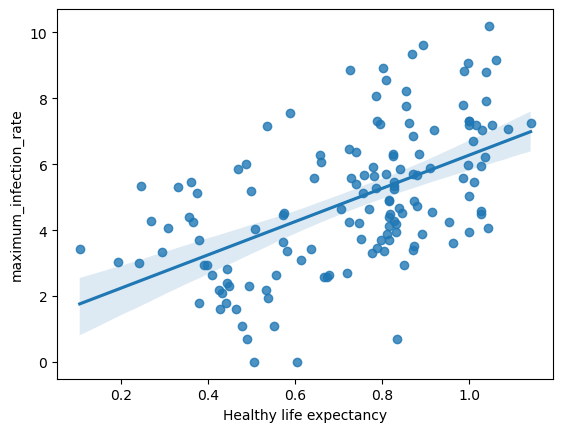

In [57]:
x = new_data["Healthy life expectancy"]
y = new_data["maximum_infection_rate"]
sns.regplot(x=x,y=np.log(y))